# Heart Disease Prediction Model

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

Load the dataset

In [2]:
data = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/Power BI Practice/Heart_Disease_Prediction.csv')

Quick overview of the data

In [3]:
print("Dataset Overview:")
print(data.head())
print(data.info())
print("Summary Statistics:")
print(data.describe())

Dataset Overview:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   80    0                3  115          564             0            2   
2   55    1                2  124          261             0            0   
3   65    1                4  128          263             0            0   
4   45    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2          

Visualize the distribution of the target variable

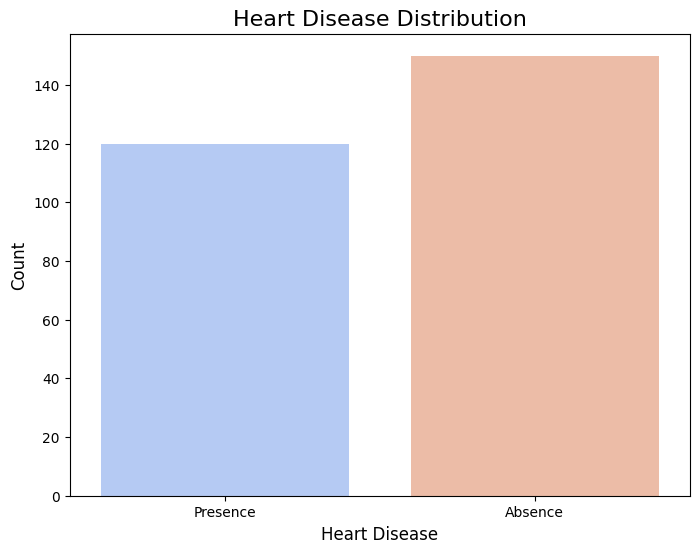

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Disease', data=data, hue='Heart Disease', palette='coolwarm')
plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Correlation heatmap

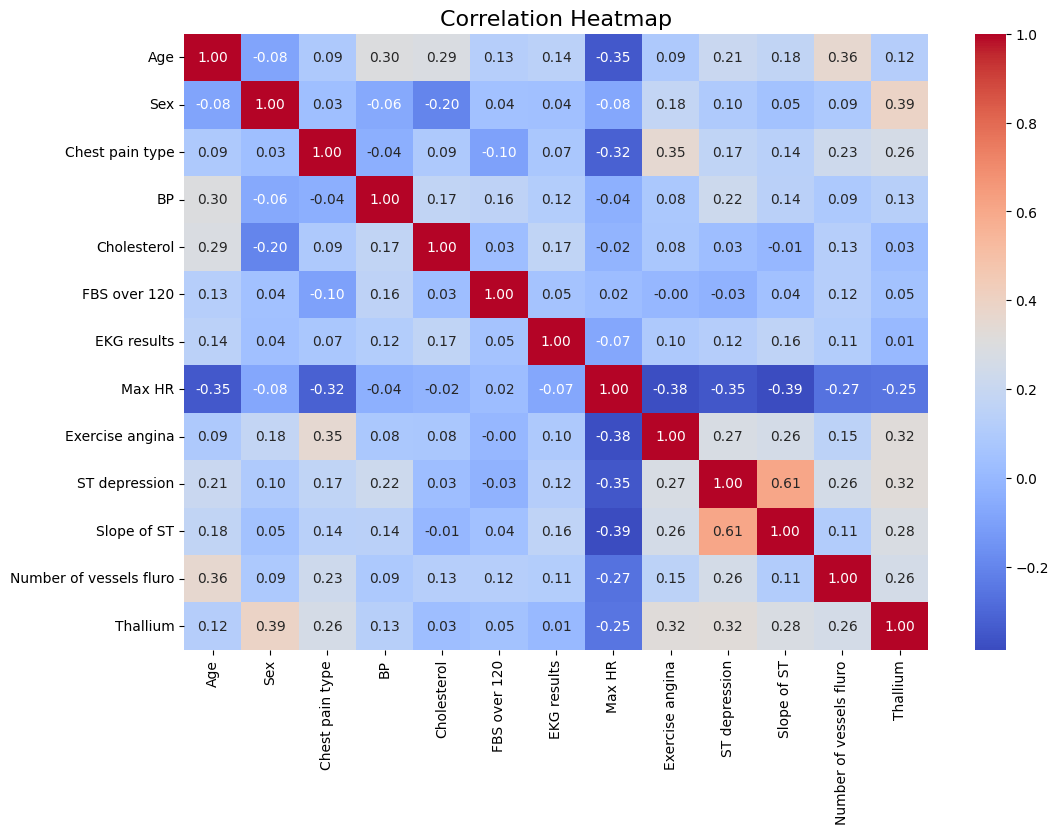

In [5]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Pairplot for numerical features

In [ ]:
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Heart Disease', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features', fontsize=18, y=1.02)
plt.show()

Boxplot of Heart Disease by Age

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Disease', y='Age', data=data,hue='Age', palette='viridis')
plt.title('Age Distribution by Heart Disease', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

Categorical feature analysis (example: Chest Pain Type)

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Chest pain type', hue='Heart Disease', data=data, palette='coolwarm')
plt.title('Chest Pain Type vs. Heart Disease', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

Scatterplot for Cholesterol vs. Max Heart Rate

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cholesterol', y='Max HR', hue='Heart Disease', data=data, palette='coolwarm')
plt.title('Cholesterol vs. Max Heart Rate', fontsize=16)
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Max Heart Rate', fontsize=12)
plt.legend(title='Heart Disease')
plt.show()

Define features (X) and target (y)

In [ ]:
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Make predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Increasing the Accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model on the balanced dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with SMOTE:", accuracy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the model on the balanced dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with SMOTE:", accuracy)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Plot feature importance

In [ ]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

Confusion matrix visualization

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix with SMOTE', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

Save the model for future use

In [ ]:
joblib.dump(model, 'heart_disease_model.pkl')
print("Model saved as 'heart_disease_model.pkl'")

Predict heart disease for a new individual

In [ ]:
def predict_heart_disease(input_data):
    """
    Predicts heart disease based on input features.
    :param input_data: Dictionary with feature names as keys and input values as values.
    :return: Predicted heart disease (0 or 1).
    """
    input_df = pd.DataFrame([input_data])
    # Align columns with training data
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    prediction = model.predict(input_df)
    return prediction[0]

Example input for prediction

In [ ]:
new_input = {
    'Age': 55,
    'Sex': 1,  # 1 for Male, 0 for Female
    'Chest pain type': 3,  # Numeric value between 1 to 4
    'BP': 140,  # Resting blood pressure
    'Cholesterol': 250,  # Serum cholesterol in mg/dl
    'FBS over 120': 1,  # 1 if fasting blood sugar > 120 mg/dl, otherwise 0
    'EKG results': 0,  # Numeric EKG result
    'Max HR': 150,  # Maximum heart rate achieved
    'Exercise angina': 1,  # 1 if exercise-induced angina, otherwise 0
    'ST depression': 2.5,  # ST depression induced by exercise relative to rest
    'Slope of ST': 2,  # Slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
    'Number of vessels fluro': 0,  # Number of major vessels colored by fluoroscopy
    'Thallium': 5  # Numeric value between 0 to 7
}
result = predict_heart_disease(new_input)
print("Predicted Heart Disease:", "Yes" if result == 1 else "No")

Testing madel and accuracy

In [ ]:
# 1. Load the Saved Model (if saved previously)
model = joblib.load('heart_disease_model.pkl')

# 2. Make Predictions on the Test Set
y_pred_test = model.predict(X_test)

# 3. Evaluate Model Performance on Test Set

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

# 4. Test the Model with a New Sample Input
# Example new input for prediction
new_input_test = {
    'Age': 60,
    'Sex': 0,  # 0 for Female
    'Chest pain type': 2,  # Numeric value between 1 to 4
    'BP': 130,  # Resting blood pressure
    'Cholesterol': 210,  # Serum cholesterol in mg/dl
    'FBS over 120': 0,  # 0 if fasting blood sugar <= 120 mg/dl, otherwise 1
    'EKG results': 1,  # Numeric EKG result
    'Max HR': 140,  # Maximum heart rate achieved
    'Exercise angina': 0,  # 0 if no exercise-induced angina
    'ST depression': 1.0,  # ST depression induced by exercise relative to rest
    'Slope of ST': 1,  # Slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)
    'Number of vessels fluro': 2,  # Number of major vessels colored by fluoroscopy
    'Thallium': 3  # Numeric value between 0 to 7
}

# Make prediction for the new input
predicted_disease = predict_heart_disease(new_input_test)
print("Predicted Heart Disease for the New Input:", "Yes" if predicted_disease == 1 else "No")